In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla
fig_size = (10,10)

# Exercise 9 - Homework
## Eugeniu Vezeteu - 886240

$$ x_k = x_{k-1} + q_{k-1} $$
$$ y_k = x_ k + r_k $$

where $x_0 = N(0,1)$, $q_{k-1} = N(0,1)$ and $r_k = N(0,1)$

### Task 1.a) 

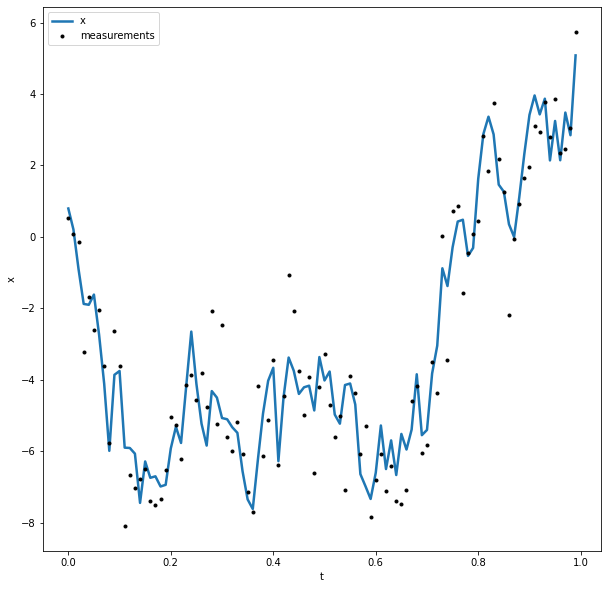

In [113]:
def propagate_state(x_init, length):
    x = np.zeros((length, x_init.shape[0]))
    x[0] = x_init
    for i in range(length-1):
        q = np.random.normal(loc=0, scale=1, size=1)
        x[i+1] = x[i] + q
    return x

x_init = np.random.normal(loc=0, scale=1, size=1)
dt = 0.01
n = 100
t = np.arange(n)*dt


x = propagate_state(x_init,t.shape[0]).squeeze(-1) #state
y = x + np.random.normal(0,1,size=n)               #measurements

plt.figure(figsize=fig_size)
plt.plot(t,x,linewidth=2.5, label='x')
plt.plot(t,y,'ok',markersize=3,alpha=1, label='measurements')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

### Task 1.b) 

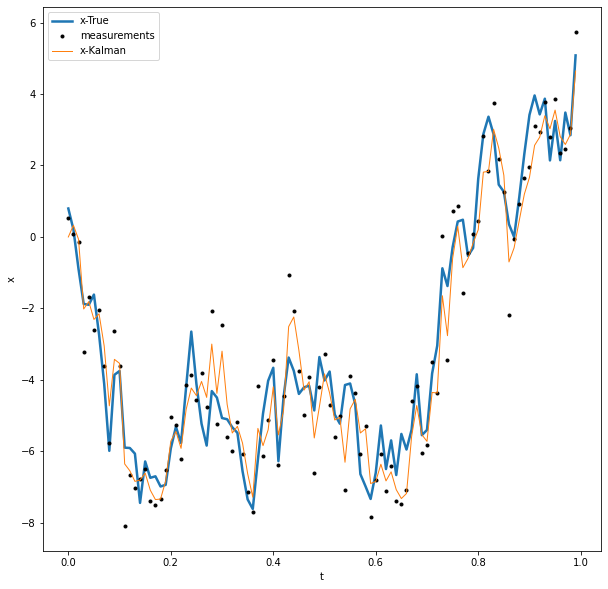

In [132]:
Q = 1.    # process variance
R = 1**2  # measurement variance
F,H = np.array([1]),np.array([1])

x_kalman=np.zeros(n)    
P=np.zeros(n)  

xhat[0] = x_init
P[0] = 1.0

for i in range(1,n):
    x_ = F*xhat[i-1]
    P_ = F*P[i-1]*F.T + Q

    K = P_/( P_+ R )
    x_kalman[i] = x_+K*(y[i]-x_)
    P[i] = (1-K)*P_

plt.figure(figsize=fig_size)

plt.plot(t,x,linewidth=2.5, label='x-True')
plt.plot(t,y,'ok',markersize=3,alpha=1, label='measurements')
plt.plot(t,x_kalman,linewidth=1, label='x-Kalman')

plt.legend()
plt.xlabel('t')
plt.ylabel('x')

plt.show()

RMSE of raw measurement = 1.0571, and RMSE of Kalman filter = 0.7384


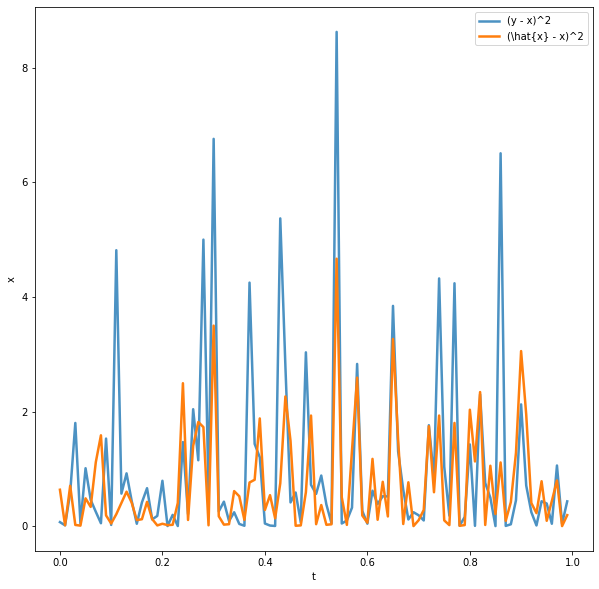

In [134]:
RMSE_raw = np.sum(np.square(y.flatten()-x))/y.shape[0]
RMSE_kalman = np.sum(np.square(x_kalman-x))/y.shape[0]
print('RMSE of raw measurement = {}, and RMSE of Kalman filter = {}'.format(round(RMSE_raw,4),round(RMSE_kalman,4)))

plt.figure(figsize=fig_size)
plt.plot(t,np.square(x-y.flatten()),linewidth=2.5,alpha=0.8, label='(y - x)^2')
plt.plot(t,np.square(x-x_kalman),linewidth=2.5, label='(\hat{x} - x)^2')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()